In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [33]:
#настройки графиков по умолчанию
sns.set (
    font_scale = 2,
    style      = 'whitegrid',
    rc         = {'figure.figsize':(20,7)}
)

In [11]:
sales_team  = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/sales_team.csv')
order_leads = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/order_leads.csv')
invoices    = pd.read_csv ('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/invoices.csv')

In [108]:
sales_team


,Sales Rep,Sales Rep Id,Company Name,company_id
0,William Taylor,ZTZA0ZLYZR85PTUJ,Melancholy Social-Role,D0AUXPP07H6AVSGD
1,William Taylor,ZTZA0ZLYZR85PTUJ,Pee-Wee Pigeon,TJW99R4RWH02INII
2,William Taylor,ZTZA0ZLYZR85PTUJ,Vaginal 36-Year-Old,3S20IO1O1DYXMUNU
3,William Taylor,ZTZA0ZLYZR85PTUJ,Unhurried Musician'S,FDWW0TQRPGMVI2A7
4,William Taylor,ZTZA0ZLYZR85PTUJ,Comprehensive Lists,C30FY83UNLVBA0O3
...,...,...,...,...
4614,Ida Woodward,LF3CPWWZKSNB1AXI,Unauthorized Increases,654ZMAXSV11BOMMI
4615,Ida Woodward,LF3CPWWZKSNB1AXI,Atom-Like Principle,42AO6UOXN0GXVHFQ
4616,Ida Woodward,LF3CPWWZKSNB1AXI,Congratulatory Economist,4B714VS0FWLGBSMU
4617,Ida Woodward,LF3CPWWZKSNB1AXI,Readable Pilots,G4D892KB5W0UCPR4


In [13]:
order_leads['Date'] = pd.to_datetime(order_leads['Date'])

In [109]:
sales_team = sales_team.rename (columns={'Company Id':'company_id',
                                        'Company Name':'company_name'})

In [19]:
order_leads= order_leads.rename (columns = {'Order Id':'order_id',
                                            'Company Id':'company_id', 
                                            'Company Name':'company_name',
                                            'Date':'date',
                                            'Order Value':'order_value',
                                            'Converted':'converted' })

In [ ]:
#График CR (Convertion rate) по дням

In [29]:
#.mean - возвращает CR(отношение успешных кейсов ко всем)
cr_by_day = order_leads.groupby(['date'])\
    .agg({'converted':'mean'})\
    .rename(columns= {'converted':'CR'})\
    .sort_values('date')

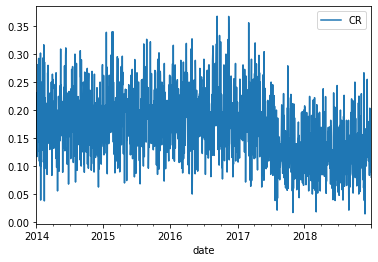

In [30]:
cr_by_day.plot()

In [76]:
#скользящее среднее
cr_by_day_rolling = order_leads.groupby(['date'])\
    .agg({'converted':'mean'})\
    .rename(columns= {'converted':'CR'})\
    .sort_values('date')\
    .rolling(30).mean()

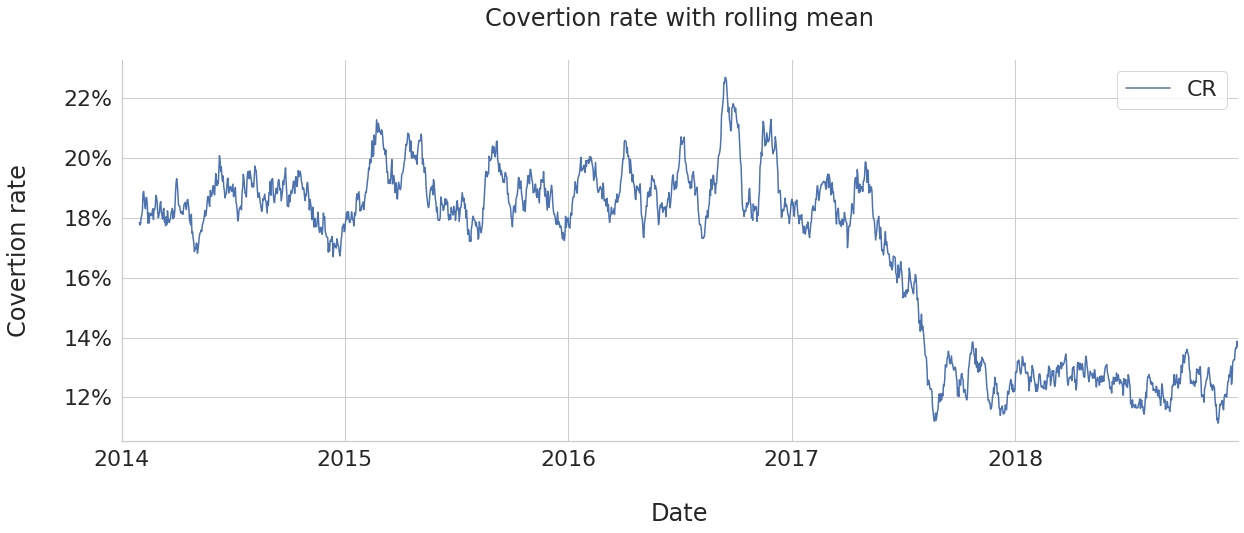

In [82]:
ax = order_leads.groupby(['date'])\
    .agg({'converted':'mean'})\
    .rename(columns= {'converted':'CR'})\
    .sort_values('date')\
    .rolling(30).mean().plot()
ax.set_title('Covertion rate with rolling mean\n')
ax.set_xlabel('\nDate')
ax.set_ylabel('Covertion rate\n')
ax.set_yticklabels(['{:.0%}'.format (i) for i in ax.get_yticks()]) #ставим в качестве значений по Y - значения в процентах
sns.despine() #убираем лишний текст

In [55]:
#специальная запись формата, позволяющая получить 0 знаков после запятой (":.0") и перевести в проценты
'{:.0%}'.format ()

'51%'

In [56]:
#получаем список значений нашего графика по оси Y
ax.get_yticks()

array([0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22, 0.24])

In [58]:
#полная команда на получение значений оси Y в %
['{:.0%}'.format (i) for i in ax.get_yticks()]

['10%', '12%', '14%', '16%', '18%', '20%', '22%', '24%']

In [80]:
def get_plot(df, x ='', y='', title =''):
    ax = df.plot()
    
    ax.set_title(title)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_yticklabels(['{:.0%}'.format (i) for i in ax.get_yticks()])

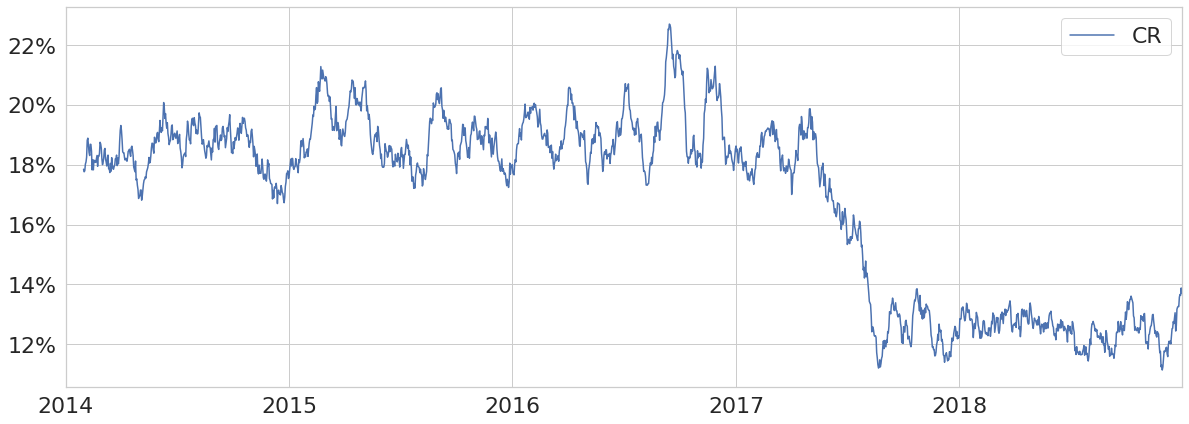

In [81]:
get_plot(cr_by_day_rolling)

In [90]:
fig = px.line(cr_by_day_rolling, x="date", y="CR", title='Covertion rate with rolling mean')
fig.show()

In [87]:
cr_by_day_rolling = cr_by_day_rolling.reset_index()

In [110]:
order_leads_with_team_data = order_leads.merge(sales_team,how = 'left', on = ['company_id','company_name'])


In [111]:
order_leads_with_team_data

,order_id,company_id,company_name,date,order_value,converted,Sales Rep,Sales Rep Id
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,William Taylor,ZTZA0ZLYZR85PTUJ
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0,William Taylor,ZTZA0ZLYZR85PTUJ
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1,William Taylor,ZTZA0ZLYZR85PTUJ
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0,William Taylor,ZTZA0ZLYZR85PTUJ
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0,William Taylor,ZTZA0ZLYZR85PTUJ
...,...,...,...,...,...,...,...,...
99995,HKZFX556ZQRZJZWR,APH243SK72T90MPS,Trade-Preparatory Quarterbacks,2017-11-06,7516,0,Ida Woodward,LF3CPWWZKSNB1AXI
99996,962CSDMAJ49E0CRK,APH243SK72T90MPS,Trade-Preparatory Quarterbacks,2018-08-02,442,1,Ida Woodward,LF3CPWWZKSNB1AXI
99997,ZW7RO9TLL6EVVJEC,APH243SK72T90MPS,Trade-Preparatory Quarterbacks,2014-11-02,8544,0,Ida Woodward,LF3CPWWZKSNB1AXI
99998,LNKGIWMZ9RT49IE9,APH243SK72T90MPS,Trade-Preparatory Quarterbacks,2017-04-01,6650,0,Ida Woodward,LF3CPWWZKSNB1AXI


In [116]:
top_sales = order_leads_with_team_data.groupby('Sales Rep', as_index = False)\
    .agg({'converted':'mean'})\
    .sort_values('converted',ascending = False)\
    .head(10)

In [117]:
top_sales

,Sales Rep,converted
151,Ginger Wright,0.368421
438,Sierra Garcia,0.363636
466,Thomas Fortner,0.352941
249,Katie Rodriquez,0.333333
225,Jose Gaines,0.326087
455,Teddy Cook,0.315789
187,Jason Miller,0.307692
468,Thomas Lindsey,0.304348
192,Jennifer Peck,0.304348
346,Nick Allen,0.298507


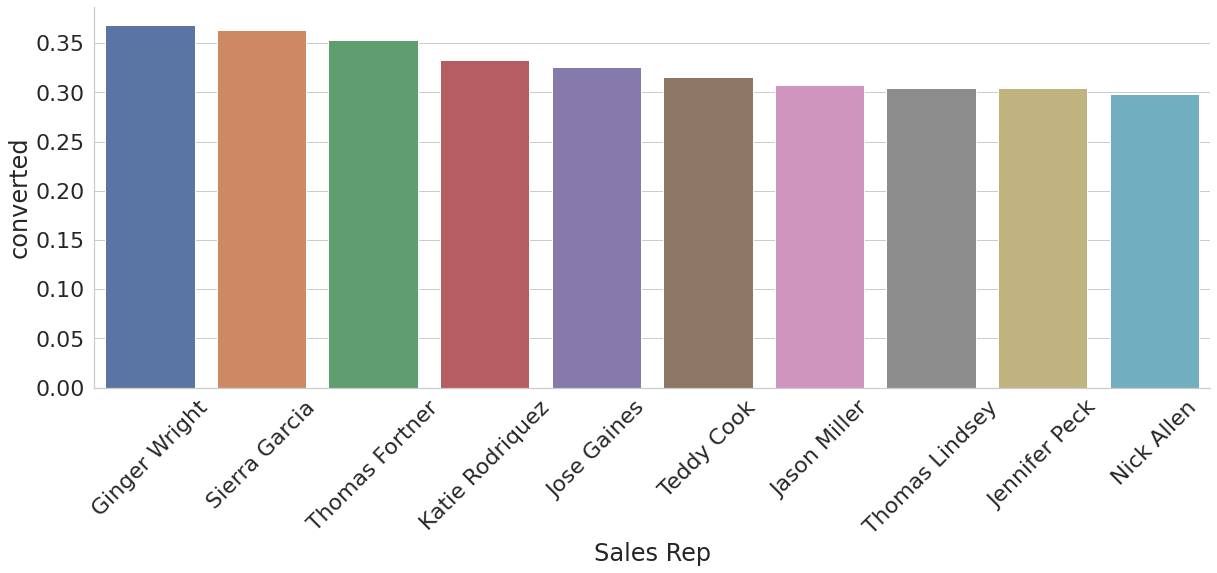

In [121]:
axx = sns.barplot(x ='Sales Rep', y = 'converted',data =top_sales)
axx.set_xticklabels(top_sales['Sales Rep'], rotation= 45)
sns.despine()

In [123]:
all_sales = order_leads_with_team_data.groupby('Sales Rep', as_index = False)\
    .agg({'converted':'mean'})\
    .sort_values('converted',ascending = False)\

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



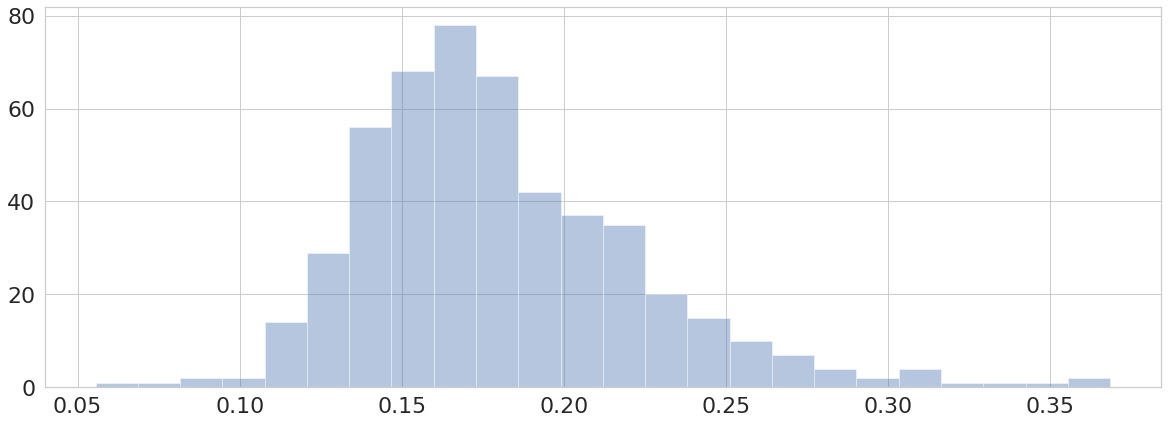

In [124]:
sns.distplot(x= all_sales.converted, kde = False)